## **Project Description – Image classification using CNNs in Keras for the Purpose of Automated Parcel Identification**

### Authored by Sean Beecroft, Asma Khalid
### July 15 - July 24, 2021, Oct 2022 - Feburary 2023

**Steps and tasks:**

**1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.**

**2. Data Pre-processing: **

a.    Normalization.

b.    Gaussian Blurring.

c.    Visualize data after pre-processing.

**3. Make data compatible: **

a. Convert labels to one-hot-vectors.

b. Print the label for y_train[0].

c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)

d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

**4. Building CNN: **

a. Define layers.

b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

**5. Fit and evaluate model and print confusion matrix. **

**6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)**


In [ ]:
!nvidia-smi

Mon Dec 19 18:29:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


1. **Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
import logging
import os
import cv2
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.utils import to_categorical as tc
import warnings

warnings.filterwarnings('ignore')

**Load Dataset**

*   Mount our google drive
*   Read the contents into a dataframe



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
colname=['Label']
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/box_pics.csv', names=colname, header=None)


#### Take a look at the head of the dataset

In [ ]:
df.head()

,Label
0,120
1,120
2,120
3,120
4,120


#### Take a look at the tail section of the label dataset

In [ ]:
df.tail()

,Label
216,Z13
217,Z13
218,Z13
219,Z13
220,Z13


**Print Shape of Labels**


In [ ]:
df.shape

(221, 1)

#### Display the info associated with our DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   221 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


Display and Describe the Count, Unique Labels, Top and Frequency

In [ ]:
df.describe()

,Label
count,221
unique,11
top,U2
freq,21


In [ ]:
df.describe().T

,count,unique,top,freq
Label,221,11,U2,21


In [ ]:
# Lets get a look at our unique variables
for col in df:
    print(df[col].unique())

['120' '1BH' '2A6' '3A1' '70' 'B0' 'B70' 'P2' 'P5' 'U2' 'Z13']


In [ ]:
smTarget = len(df['Label'].unique())
print(smTarget)

11


### Visualise the contents of the label dataset by proportion


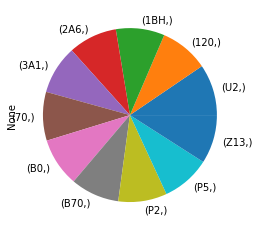

In [ ]:
df.value_counts().plot(kind='pie')

#### Print out the exact tensorflow version number

In [ ]:
!pip install pip install tensorflow==2.5.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.4 MB 34 kB/s 
     |████████████████████████████████| 132 kB 66.4 MB/s 
     |████████████████████████████████| 1.2 MB 90.4 MB/s 
     |████████████████████████████████| 14.9 MB 84.3 MB/s 
     |████████████████████████████████| 462 kB 105.0 MB/s 
     |████████████████████████████████| 4.0 MB 86.5 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=d830dd58c3f5f552bb3f85e3b26da89725fd43815256eeec35964714f55d08b4
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl size=72347 sha256=4a80495d72e38fad5934f0215a31b75b5f6e5d282d6787d310290614f178ea07
  Stored in directory: /root/.cache/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built term

2.9.2


**Load Dataset**

In [ ]:
img_array = np.load('/content/drive/My Drive/Colab Notebooks/box_pics.npy')


**Print Shape of Dataset**

In [ ]:
print(img_array.shape)


(221, 480, 640, 3)


In [ ]:
print(img_array.shape)


(221, 480, 640, 3)


In [ ]:
# original array with shape (221, 480, 640, 3)
#arr = np.resize (img_array, (221, 640, 480, 3))

# rearrange dimensions to get shape (221, 640, 480, 3)
#img_array = np.transpose(arr, (0, 2, 1, 3))

**Visualise some of the images in the dataset**

In [ ]:
print(img_array.shape)

(221, 480, 640, 3)


In [ ]:
#img_array_resized=[]
#_w = int(640/2)
#_h = int(480/2)
#print(_w)
#print(_h)
#print(img_array.shape[0])
#for i in range(0,img_array.shape[0]):
#  img=Image.fromarray(np.asarray(img_array[i]))
#  img=img.resize(size=(_w,_h))
#  img_array_resized.append(np.array(img))


In [ ]:
from PIL import Image

after this point use img_array_resized


In [ ]:
#img_array_resized=np.array(img_array_resized)

In [ ]:
np.save("box_pics_resized.npy",img_array)

In [ ]:
# img_array_resized = np.load('/content/drive/My Drive/Colab Notebooks/box_pics_resized.npy')

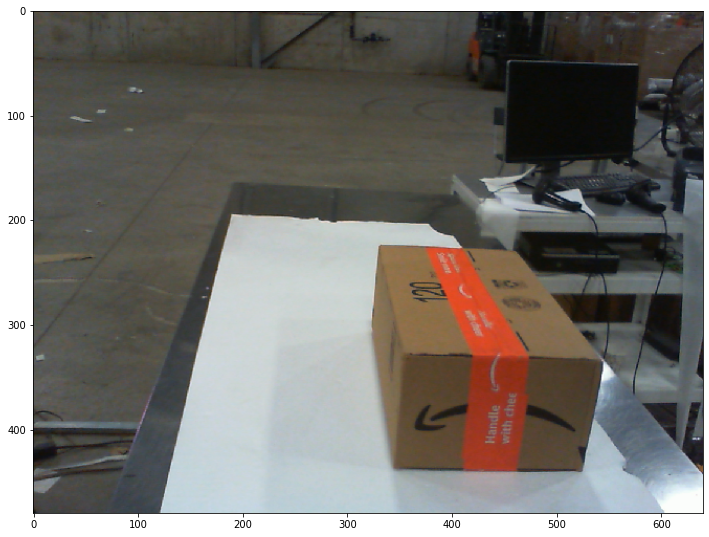

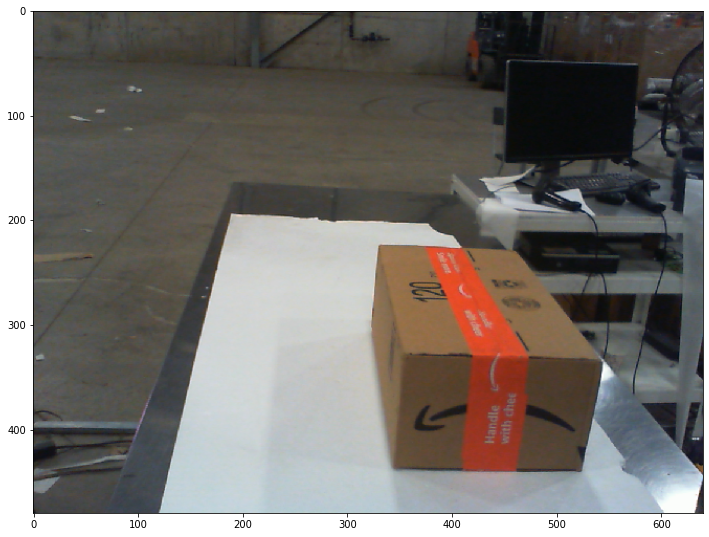

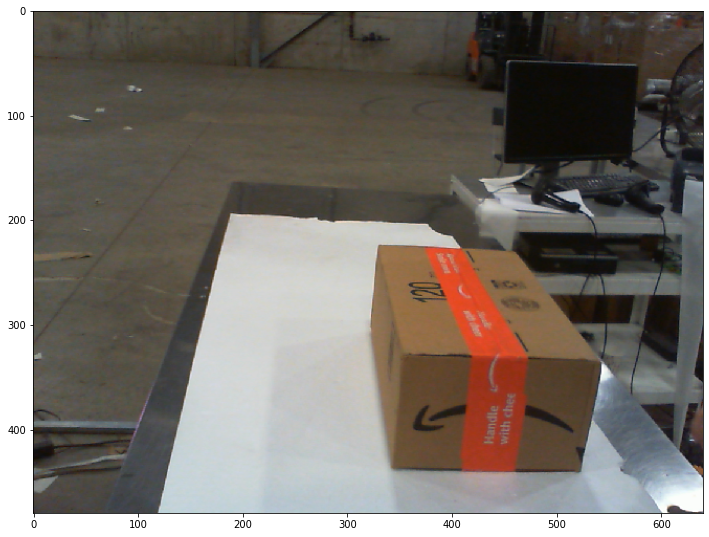

In [ ]:
from matplotlib import pyplot as plt

# display the first 3 images, sharp, as they are found without alteration in the dataset.
for i in range(3):
  plt.figure(figsize=(12,12))
  #plt.subplot(2, 3, i + 1)
  plt.imshow(img_array[i])


**Visualise the images with Gaussian Blur**

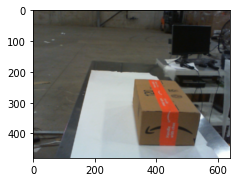

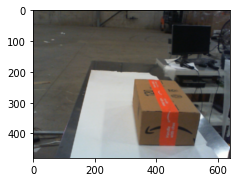

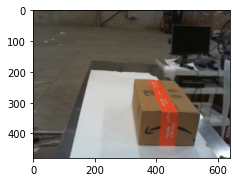

In [ ]:
# Display images with gaussian blur

for i in range(3):
  gauss = cv2.GaussianBlur(img_array[i],(5,5),0)
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  plt.imshow(gauss, cmap='gray')


**Visualize the images in gray scale**

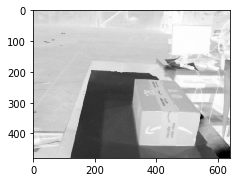

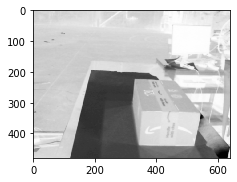

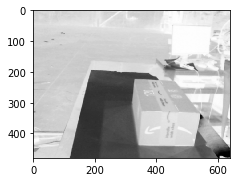

In [ ]:
#Blur and make gray scale
grayscale = img_array/255
for i in range(3):
  gray = cv2.GaussianBlur(img_array[i],(5,5),0)
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  bwsrc = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY);
  plt.imshow(bwsrc, cmap='Greys', interpolation='nearest')

**Visualise the images with straight mean visualisation**

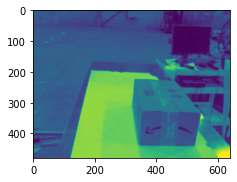

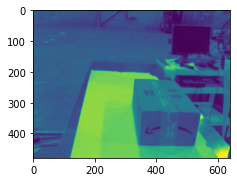

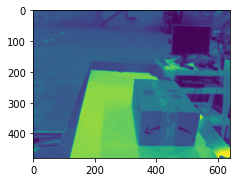

In [ ]:
# Straight mean visualization
for i in range(3):
  gray = cv2.GaussianBlur(img_array[i],(5,5),0)
  gray = np.mean(gray, axis=2)
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  plt.imshow(gray)


**Visualise the images as black and white with a binary threshold**

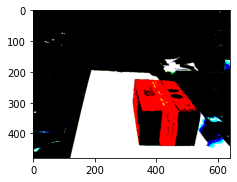

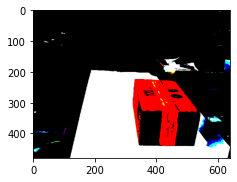

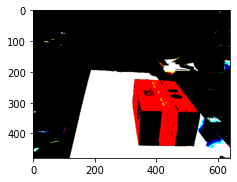

In [ ]:
# Display images as gray scale
# Straight mean visualization
for i in range(3):
  (thresh, blackAndWhiteImage) = cv2.threshold(img_array[i], 127, 255, cv2.THRESH_BINARY)
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  plt.imshow(blackAndWhiteImage)


**Display Image Edges using Laplacian**

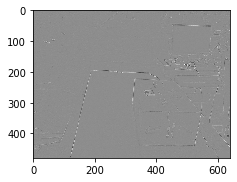

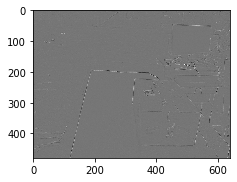

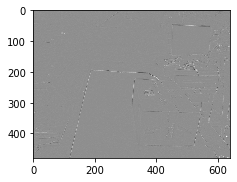

In [ ]:
# Display image edges (laplacian)
for i in range(3):
  gray = img_array[i]
  gray = np.mean(gray, axis=2)
  laplacian = cv2.Laplacian(gray,cv2.CV_64F)
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  plt.imshow(laplacian, cmap='Greys', interpolation='nearest')


#### Display image edges (Sobel Horizontal)

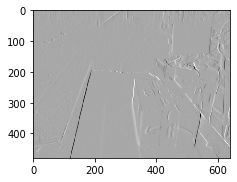

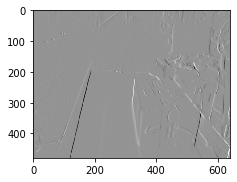

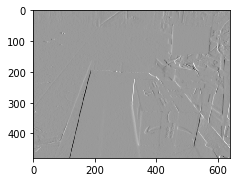

In [ ]:
# Display image edges (Sobel Horizontal)
for i in range(3):
  gray = img_array[i]
  gray = np.mean(gray, axis=2)
  sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)  # x
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  plt.imshow(sobelx, cmap='Greys', interpolation='nearest')
  plt.show() 


#### Display image edges (Sobel Vertical)

In [ ]:
# Display image edges (Sobel Vertical)
for i in range(3):
  gray = img_array[i]
  gray = np.mean(gray, axis=2)
  sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)  # y
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  plt.imshow(sobely, cmap='Greys', interpolation='nearest')
  plt.show() 

In [ ]:
# Display image edges (Sobel Edges Combined)
sobelc = None
for i in range(3):
  gray = img_array[i]
  sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=1)  # y
  sobelc = cv2.Sobel(sobely,cv2.CV_64F,1,0,ksize=1)  # x
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  plt.imshow(sobelc)
  plt.show() 

### Reload a pristine copy of the images to avoid any issues - prefiltering done by accident.

In [ ]:
#images.npy is replaced by box_pics.npy
# img_array = np.load('/content/drive/My Drive/Colab Notebooks/box_pics.npy')

In [ ]:
# # Print out the length of the image array, how many images does this npy file contain?
sz = len(img_array)
print(sz)

In [ ]:
# Preprocess images using gaussian blur filtering

gaussian = img_array.copy()/255
for i in range(sz):
  #gaussian[i] = img_array[i]
  gaussian[i] = cv2.blur(gaussian[i],(1,1))

  #gaussian[i] = cv2. #cv2.GaussianBlur(gaussian[i],(1,1),0)
  #gaussian[i] = cv2.Laplacian(gaussian[i],cv2.CV_64F)
  #gaussian[i] = cv2.Sobel(gaussian[i],cv2.CV_64F,1,0,ksize=1)  # y
  #gaussian[i] = cv2.Sobel(gaussian[i],cv2.CV_64F,0,1,ksize=1)  # x


for i in range(3):
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  plt.imshow(gaussian[i])

### Setup X and y for our test split

In [ ]:
normal = gaussian.copy()
X = normal
y = df 

In [ ]:
print(X.shape)
#X = X.transpose(221, 320, 240, 3)
#print(X.shape)


In [ ]:
# original array with shape (221, 480, 640, 3)

# rearrange dimensions to get shape (221, 640, 480, 3)
X = np.transpose(X, (0, 2, 1, 3))

In [ ]:
print (X.shape)

In [ ]:

# resize array to shape (221, 320, 240, 1)
X = np.resize(X, (221, 320, 240, 1))
print(X.shape)

### Create a dictionary for our softmax lookup

In [ ]:
y.shape

In [ ]:
box_dict = {0:'1BH',1:'2A6',2:'3A1', 3:'70', 4:'120', 5:'B0', 6:'B70', 7:'P2', 8:'P5', 9:'U2', 10:'Z13'}

In [ ]:
# preview our images before we proceed
for i in range(3):
  gray = normal[i]
  plt.figure(figsize=(12,12))
  plt.subplot(2, 3, i + 1)
  plt.imshow(gray, cmap='Greys', interpolation='nearest')

### Map our labels to softmax numbers

1.   Convert labels to one-hot-vectors.
2.   Map labels to softmax output values


#### Convert labels to one-hot-vectors. Unorthodox, but works. I could have used LabelEncoder but this was straight forward and on-hand

In [ ]:
for i in range(len(box_dict)):
  y = y.replace(box_dict[i], i)
  
print(len(box_dict))

### Lets look at our revised head

In [ ]:
y.head(220)

### Lets compare it to our old dataframe

In [ ]:
df.head()

### Check the tail

In [ ]:
y.tail()

### Check the tail of the old data frame

In [ ]:
df.tail()

#### Transform y into categorical values in relation to our softmax target output



1.   This helps with one-hot-encoding
2.   Set a fixed seed, set a image to check



In [ ]:
smTarget = len(box_dict)

y = tc(y, num_classes=smTarget)
seed = 7
check = 220

#### Santity Check

In [ ]:
y.shape

Split the data set into training and validation set

### Split our test and training set using 0.3

*   List item
*   List item



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X.shape)


#### Print y_train[0]

In [ ]:
print(y_train[0])
print(y_train[153])

#### Examine the size and shape of our test and training sets

In [ ]:
# Print the shape of our test set and training set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#### The shape of our training set and test set look correct, so we shouldn't need to do any reshaping

#### Initialise our optimizer

In [ ]:
adam = Adam(lr=0.0001)

#### Build our model

In [ ]:
# Import some additional libraries and objects for our model

inp_sh = (320, 240, 1)
ks = (5,5)
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=ks, padding='same', input_shape=inp_sh, activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Conv2D(128, ks, padding='same', activation="relu")) # 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Conv2D(128, ks, padding='same', activation="relu")) # 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=ks, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=ks, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=ks, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=ks, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalMaxPooling2D())
model.add(tf.keras.layers.Flatten()) # Flatten the image so we can pass it to our fully connected layer
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(smTarget, activation="softmax"))


#### Compile our model

In [ ]:
# Compile the model
model.compile(loss=['loss'], metrics=["accuracy"], optimizer="adam")


#### Build our model including our input shape

In [ ]:
model.build( input_shape=X_train.shape)

#### Display the summary of layers in our model

In [ ]:
model.summary()

The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

It is good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [ ]:
X_train = X_train.astype('float32') # Conversion to float type from integer type.
X_test = X_test.astype('float32')
#X_train /= 255.0 # Division by 255
#X_test /= 255.0
print(X_train.shape)
print(X_test.shape)
print(X.shape)


In [ ]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50)


In [ ]:
model_checkpoint =  tf.keras.callbacks.ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           save_freq=1)


### Create our image generator and fit it to our training data


In [ ]:
# data augmentation
generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 180, zoom_range = 0.2, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, vertical_flip = True)
generator.fit(X_train)
print(X_train.shape)
print(X_test.shape)


In [ ]:
lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                        patience=50, 
                        verbose=1, 
                        factor=0.3, 
                        min_lr=0.0001)
filepath="/content/drive/My Drive/Colab Notebooks/weights.best_{epoch:02d}-{accuracy:.2f}.h5"
callbacks_list = [lrr, model_checkpoint, early_stopping]


Fit the model:
We can fit this model with 100 epochs and a batch size of 5.

A small number of epochs was chosen to quickly run the code so we can understand the concepts ahead. Normally the number of epochs would be one or two orders of magnitude larger for this problem.

### Train the model on the test data


*   split our validation data into 0.2
*   Set 50 epochs, batch size of 10, 
*   steps per epoch at a number to get us as close to possible as steps_per_epoch * epoch = 3325
*   Use our callbacks for early stopping and monitoring training




In [ ]:
print(X_train.shape)

In [ ]:
# Fit the model
history = model.fit( x=X_train, y=y_train, epochs=1, batch_size=1, steps_per_epoch=221, validation_split = 0.3, validation_data=(X_test, y_test), callbacks=callbacks_list, use_multiprocessing=True  )

In [ ]:
print(X_test.shape)


#### View the shape of our training set and our test set

In [ ]:
check = 10 # A variable we can use to check the boxes.
v = model.predict(X[10])
print(v)

In [ ]:
y_pred = model.predict(X_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 
cmatrix = confusion_matrix(y_check, y_class)
cmatrix

#### Visualise the performance and learning rate, viewing the divergence between accuracy on the training set and the validation (test set)


In [ ]:
# plot training history
plt.plot(history.history['val_accuracy'], label='validation dataset')
plt.plot(history.history['accuracy'], label='training dataset')
plt.legend()
plt.show()

In [ ]:
X_t[check:]

#### Score our model and evaluate its performance

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


#### Look at the raw output of our confusion matrix

In [ ]:
y_pred = model.predict(X_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 
cmatrix = confusion_matrix(y_check, y_class)
cmatrix

### Visualize a heatmap of our confusion matrix

In [ ]:
sns.heatmap(cmatrix, xticklabels=box_dict)

#### Visualize our prediction

In [ ]:
def predict(check):
  index = 0
  highest = 0
  for i in range(len(y_pred[check])):
    v = y_pred[check][i]
    if( v > highest):
      highest = v
      index = i
  print("predicted:", box_dict[index], " @ index ", index, " in ", y_pred[check])
  print("actual:", box_dict[index], " @ index ", index, " in ", y_test[check])
  

In [ ]:
predict(2)

In [ ]:
plt.figure(figsize=(12,12))
gray = X_test[2]
plt.imshow(gray)

In [ ]:
predict(3)

In [ ]:
plt.figure(figsize=(12,12))
gray = X_test[3]
plt.imshow(gray)

In [ ]:
predict(33)

In [ ]:
plt.figure(figsize=(12,12))
gray = X_test[33]
plt.imshow(gray)

In [ ]:
predict(36)

In [ ]:
plt.figure(figsize=(12,12))
gray = X_test[36]
plt.imshow(gray)

In [ ]:
predict(59)

In [ ]:
plt.figure(figsize=(12,12))
gray = X_test[59]
plt.imshow(gray)